En canvas podrás encontrar la base de datos "iris-data". Borra la variable "Id" de la base de datos, ya que esta no contiene información relevante. Explica los algoritmos que utilizan los métodos de clasificación: regresión logística, Bayes y análisis de discriminate. De ser el caso muestra las ecuaciones correspondientes.

Utiliza los algoritmos de clasificación antes mencionados para predecir el tipo de planta.  Utiliza todas las variables de la base de datos como variables regresoras. Muestra la exactitud de cada modelo y su correspondiente matriz de confusión. ¿Qué modelo fue el méjor? ¿Por qué crees que se suceda esto?

In [97]:
# bibliotecas necesarias
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.set_printoptions(precision=4)
sns.set(style = "white", color_codes = True)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

#Carga de datos
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estadistica/Iris.csv')

In [98]:
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [99]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#Regresión Logística

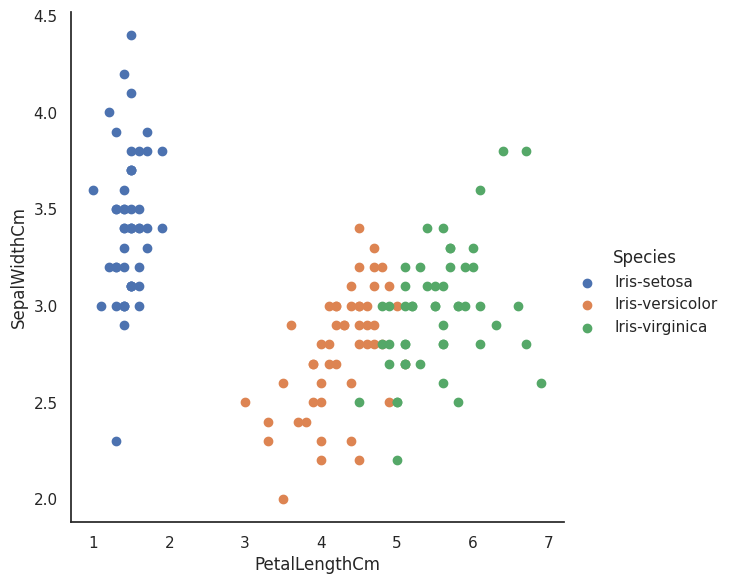

In [100]:
sns.FacetGrid(df, hue = "Species", height = 6).map(plt.scatter, "PetalLengthCm","SepalWidthCm").add_legend()

In [101]:
model = LogisticRegression()

In [102]:
model.fit(X, y)

LogisticRegression()

In [103]:
model.score(X, y)

0.9733333333333334

In [104]:
expected = y
pred = model.predict(X)
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [105]:
report = (metrics.classification_report(expected, pred))
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [106]:
cm = (metrics.confusion_matrix(expected, pred ))
cm

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

Text(0.5, 19.049999999999997, 'Prediccion')

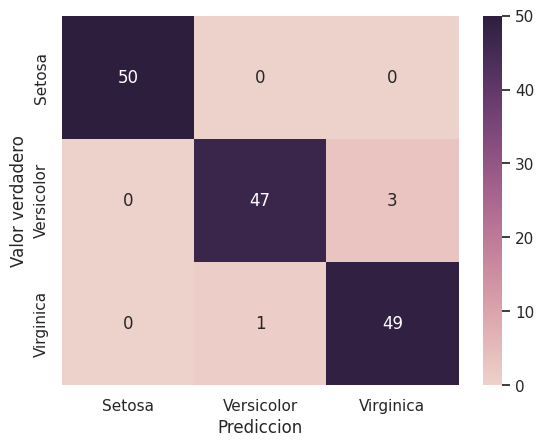

In [107]:
sns.heatmap(cm, annot = True, cmap=sns.cubehelix_palette(as_cmap=True))
class_names = ['Setosa', 'Versicolor', 'Virginica']
tick_marks = [0.5, 1.5, 2.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Prediccion')

En este modelo de regresión logística se tiene un accuracy de 0.97, además que la precisión, recall y f1-score de las tres clases es bastante bueno.

#Análisis Discriminante

In [108]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [109]:
class_le = LabelEncoder()
y = class_le.fit_transform(df['Species'].values)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [110]:
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(X)

In [111]:
S_W = np.zeros((4,4))
for i in range(3):
    S_W += np.cov(x_train_std[y==i].T)

In [112]:
N=np.bincount(y)
vecs=[]
[vecs.append(np.mean(x_train_std[y==i],axis=0)) for i in range(3)]
mean_overall = np.mean(x_train_std, axis=0)
S_B=np.zeros((4,4))
for i in range(3):
    S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))

In [113]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('valores de Eigen en orden descendente:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

valores de Eigen en orden descendente:

1581.3259321867617
13.600776328162286
3.3265872147990916e-13
1.1756128328316217e-13


In [114]:
W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].reshape(4,1))).real
x_train_lda = x_train_std.dot(W)

In [115]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_train_lda = lda.fit_transform(x_train_std, y)

In [116]:
data=pd.DataFrame(x_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,8.084953,-0.328454,0
1,7.147163,0.755473,0
2,7.511378,0.238078,0
3,6.837676,0.642885,0
4,8.157814,-0.540639,0


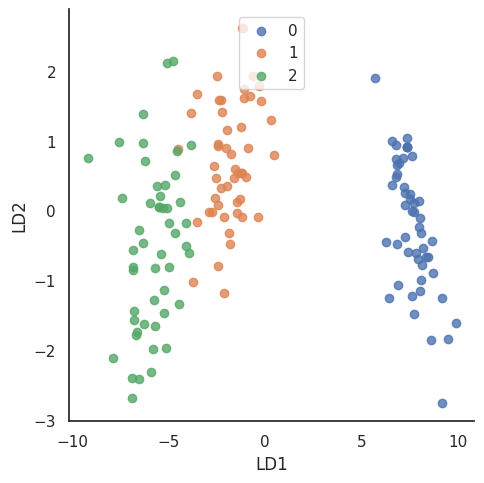

In [117]:
markers = ['o', 'o','o']
colors = ['r', 'b','g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers,fit_reg=False,legend=False)
plt.legend(loc='upper center')
plt.show()

In [118]:
lda.score(X, y)

0.3333333333333333

#Bayes

In [119]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [120]:
#Conjunto de entrenamiento y conjunto de pruebas
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [121]:
#convertir las etiquetas categóricas en números enteros.
from sklearn.preprocessing import LabelEncoder
l_encode = LabelEncoder()
y = l_encode.fit_transform(y)

In [122]:
class_names = l_encode.classes_
print("Nombres de clases correspondientes a los valores 0, 1 y 2:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Nombres de clases correspondientes a los valores 0, 1 y 2:
0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica


In [123]:
#Estandarización de datos
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [124]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [125]:
y_pred = classifier.predict(x_test)

Text(0.5, 19.049999999999997, 'Prediccion')

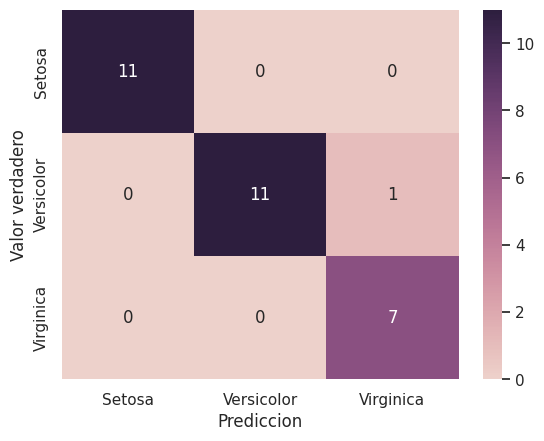

In [126]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap=sns.cubehelix_palette(as_cmap=True))
class_names = ['Setosa', 'Versicolor', 'Virginica']
tick_marks = [0.5, 1.5, 2.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.ylabel('Valor verdadero')
plt.xlabel('Prediccion')

In [127]:
print("Exactitud del modelo", classifier.score(x_test, y_test))

Exactitud del modelo 0.9666666666666667


Por lo tanto, el modelo más efectivo es regresión logística, al obtener un accurcy muy alto, y valores en recall, precisión y f1-score bastante buenos.